# Preparation

In [1]:
import pandas as pd

In [2]:
# Data ingestion
DATASET_LOC = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/dataset.csv"
df = pd.read_csv(DATASET_LOC)
df.head()

,id,created_on,title,description,tag
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...,computer-vision
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...,computer-vision
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla...",other
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,other
4,25,2020-03-07 23:04:31,AttentionWalk,"A PyTorch Implementation of ""Watch Your Step: ...",other


In [3]:
from sklearn.model_selection import train_test_split

In [5]:
df.tag.value_counts()

natural-language-processing    310
computer-vision                285
other                          106
mlops                           63
Name: tag, dtype: int64

In [6]:
test_size = 0.2

In [7]:
train_df, val_df = train_test_split(df, stratify=df.tag, test_size=test_size, random_state=1234)

In [8]:
train_df.tag.value_counts()

natural-language-processing    248
computer-vision                228
other                           85
mlops                           50
Name: tag, dtype: int64

# Exploration

In [10]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [11]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings("ignore")
from wordcloud import WordCloud, STOPWORDS

In [12]:
all_tags = Counter(df.tag)
all_tags

Counter({'computer-vision': 285,
         'other': 106,
         'natural-language-processing': 310,
         'mlops': 63})

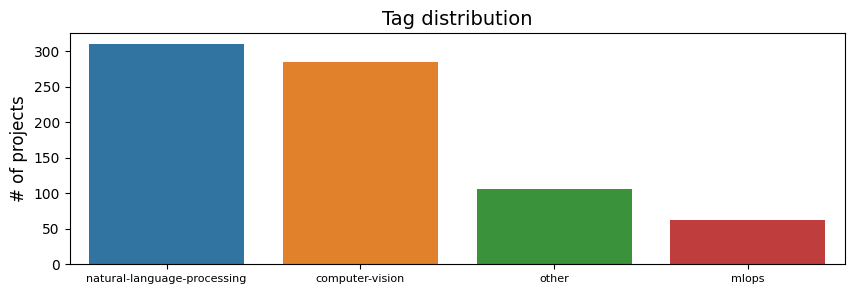

In [15]:
tags, tag_counts = zip(*all_tags.most_common())
plt.figure(figsize=(10, 3))
ax = sns.barplot(x=list(tags), y=list(tag_counts))
ax.set_xticklabels(tags, rotation=0, fontsize=8)
plt.title("Tag distribution", fontsize=14)
plt.ylabel("# of projects", fontsize=12)
plt.show()

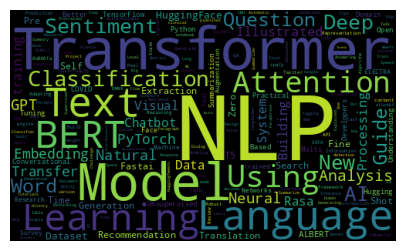

In [16]:
tag="natural-language-processing"
plt.figure(figsize=(10, 3))
subset = df[df.tag==tag]
text = subset.title.values
cloud = WordCloud(
    stopwords=STOPWORDS, background_color="black", collocations=False,
    width=500, height=300).generate(" ".join(text))
plt.axis("off")
plt.imshow(cloud)